# Implementing environments and agents
## The Environment
<img src="https://raw.githubusercontent.com/udacity/CVND_Localization_Exercises/f5d5e90e2548aba4a145dd31f352fa9da19244dc/4_2_Robot_Localization/images/numbered_grid.png" width="30%" height="30%">

###  The `init`-function

In [1]:
class SimpleGridEnv:
    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.state = 0  # Start at the first cell
        self.goal = grid_size - 1  # Goal is the last cell

### The `reset`-function

In [2]:
    def reset(self):
        self.state = 0
        return self.state

### The `step`-function

In [3]:
    def step(self, action):
        # Action: 0 = Move left, 1 = Move right
        if action == 0:
            self.state = max(0, self.state - 1)
        elif action == 1:
            self.state = min(self.grid_size - 1, self.state + 1)

        # Check if the goal is reached
        done = self.state == self.goal
        reward = 1 if done else -0.01  # Small penalty for each step

        return self.state, reward, done

## The Agent
### The policy function

In [4]:
import random

class RandomAgent:
    def __init__(self):
        pass
    
    def policy(self):
        return random.choice([0, 1])  # Randomly choose left or right

### The training function

In [5]:
def train(env, agent, episodes=10):
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = agent.policy()
            next_state, reward, done = env.step(action)
            total_reward += reward
            state = next_state
        
        print(f"Episode {episode+1}: Total Reward: {total_reward:.2f}")

### The Training Loop
#### `1D_Robot.py`
We now bring everything together in a simple training loop, where the agent interacts with the environment over multiple episodes.

In [ ]:
## TODO

# Creating our first Gym environment
## Frozen Lake

In [7]:
import gym
env = gym.make("FrozenLake-v0")
env.render()


SFFF
FHFH
FFFH
HFFG


## Exploring the environment
### States
Player’s current position:
$$\text{row}_\text{current} * n_\text{rows} + \text{col}_\text{current}$$
where both the $\text{row}$ and $\text{col}$ start at 0.

In [9]:
print(env.observation_space)

Discrete(16)


$n_S$

In [8]:
## TODO

nS: 16


### Actions
The action shape is `(1,)` in the range `{0, 3}` indicating which direction to move the player.

|Number|Action|
|-|-|
|0|Left|
|1|Down|
|2|Right|
|3|Up|

In [10]:
print(env.action_space)

Discrete(4)


$n_A$

In [11]:
## TODO

nA: 4


### Reward schedule:
- Reach goal: +1
- Reach hole: 0
- Reach frozen: 0

### Transition probability
`env.P[state][action]`

In [12]:
print(env.P[0][2])

[(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]



|Transition probability|Next state|Reward|Is terminal state|
|-|-|-|-|
|0.333334|4(F)|0.0|False|
|0.333331|1(F)|0.0|False|
|0.333330|0(S)|0.0|False|

## Generating an episode
`reset`:

In [16]:
state = env.reset()

### Action selection
Let's suppose we are in state 3 (F) 

In [43]:
env = gym.make("FrozenLake-v0")
state = env.reset()
print(state, env.s)
env.render()

0 0

SFFF
FHFH
FFFH
HFFG


`step`

In [45]:
(state, _, _, _) = env.step(1)
print(state, env.s)
env.render()

4 4
  (Down)
SFFF
FHFH
FFFH
HFFG


Manually set the state:
`env = env.unwrapped`

In [51]:
env = env.unwrapped
env.s = 3
print(env.s)
env.render()

3
  (Down)
SFFF
FHFH
FFFH
HFFG


Say we need to perform action 1 (down) and move to the new state 7 (H). 

In [54]:
env.step(1) # Action 1 (Down)

(7, 0.0, True, {'prob': 0.3333333333333333})

It implies that when we perform action 1 (down) in state 3 (F):
- We reach the next state 7 (H).
- The agent receives the reward 0.0.
- Since the next state 7 (H) is a terminal state, it is marked as True.
- We reach the next state 7 (H) with a probability of 0.33333.

In [55]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


In [56]:
(next_state, reward, done, info) = env.step(1)

Perform a random action:
- The `sample` function

In [57]:
random_action = env.action_space.sample()

`(s2, r, done, _)`

In [58]:
next_state, reward, done, info = env.step(random_action)

## Generating an episode

First, let's set the number of time steps:

`num_timesteps = 20`

For each time step:

`for t in range(num_timesteps):`

Randomly select an action by sampling from the action space:

`    random_action = env.action_space.sample()`

Perform the selected action:

`    next_state, reward, done, info = env.step(random_action)`

If the next state is the terminal state, then break. This implies that our episode ends:

`if done:`

`break`

In [59]:
## TODO

Time Step 0 :

SFFF
FHFH
FFFH
HFFG

Time Step 1 :
  (Down)
SFFF
FHFH
FFFH
HFFG

Time Step 2 :
  (Up)
SFFF
FHFH
FFFH
HFFG

Time Step 3 :
  (Down)
SFFF
FHFH
FFFH
HFFG

Time Step 4 :
  (Right)
SFFF
FHFH
FFFH
HFFG

Time Step 5 :
  (Up)
SFFF
FHFH
FFFH
HFFG

Time Step 6 :
  (Down)
SFFF
FHFH
FFFH
HFFG


# More Gym environments

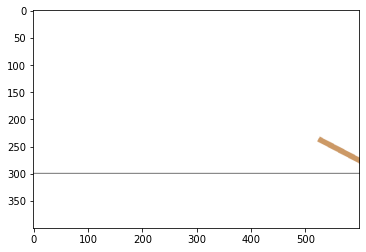

In [60]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# env = gym.make('Breakout-v0')
env = gym.make('CartPole-v1')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

# Your Turn (`TODO`)

> **TODO:** Visualize a Given Value Function

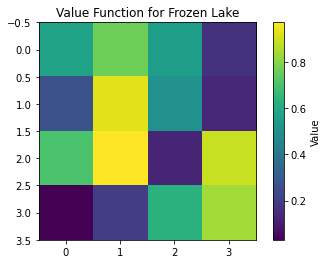

In [61]:
# TODO

> **TODO:** Get a Q-Table, Extract the Value Function, and Annotate Values

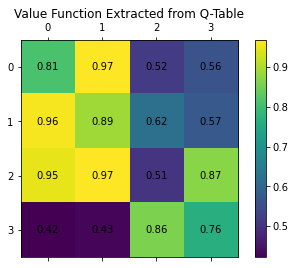

In [65]:
# TODO

> **TODO:** Generate a Policy from a Q-Table and Visualize It Over the Value Function on the Same Plot

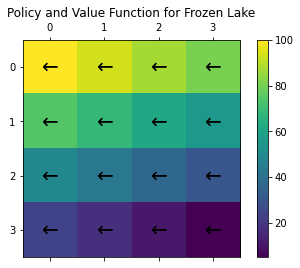

In [66]:
# TODO